<a href="https://colab.research.google.com/github/Saonoke/PVCK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import image as im

In [33]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Menambahkan padding jika diperlukan
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Ukuran hasil konvolusi
    image_result = np.zeros_like(image)

    # Ukuran gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Lakukan konvolusi
    for i in range(1, image_height - kernel_height + 1, stride):
        for j in range(1, image_width - kernel_width + 1, stride):
            image_result[i][j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)

    return image_result

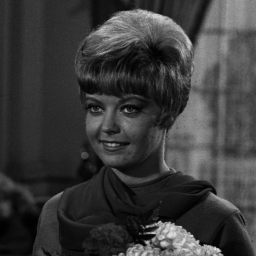

In [38]:
  img = cv.imread('/content/drive/MyDrive/female.tiff')
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  cv2_imshow(img_gray)

In [35]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
left_sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
canny_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
prewitt_edge = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
# Membuat Gaussian kernel 3x3 secara manual
gaussian_blur = np.array([[1, 4,6,4,1], [4,16,24,16,4], [6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]) / 256

gauss_kernel = cv.getGaussianKernel(5, sigma=1)  # Kernel 5x5
gauss_kernel_2d = gauss_kernel @ gauss_kernel.T

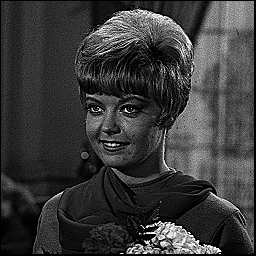

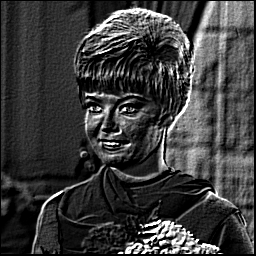

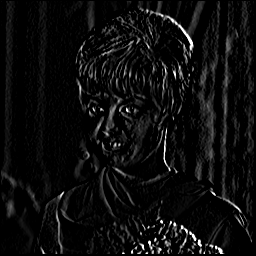

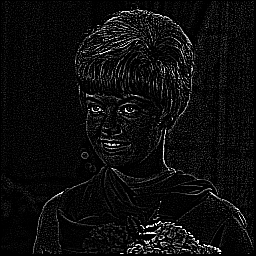

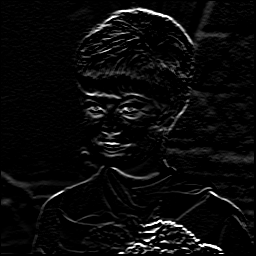

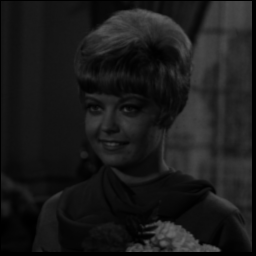

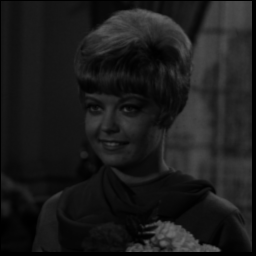

In [36]:
img_sharpen = convulation2d(img_gray,kernel_sharpen,1,0)
cv2_imshow(img_sharpen)

img_emboss = convulation2d(img_gray,kernel_emboss,1,0)
cv2_imshow(img_emboss)

img_left_sobel = convulation2d(img_gray,left_sobel,1,0)
cv2_imshow(img_left_sobel)

img_canny_edge = convulation2d(img_gray,canny_edge,1,0)
cv2_imshow(img_canny_edge)

img_prewitt_edge = convulation2d(img_gray,prewitt_edge,1,0)
cv2_imshow(img_prewitt_edge)

img_gaussian_blur = convulation2d(img_gray,gaussian_blur,1,0)
cv2_imshow(img_gaussian_blur)


img_gaussian_blur_1 = convulation2d(img_gray,gauss_kernel_2d,1,0)
cv2_imshow(img_gaussian_blur_1)


In [39]:
import cv2
import numpy as np

def convolution2d(image, kernel, stride=1, padding=0):
    # Add padding to the image if necessary
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Prepare the result image
    image_result = np.zeros_like(image)

    # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Perform convolution operation
    for i in range(1, image_height - kernel_height + 1, stride):
        for j in range(1, image_width - kernel_width + 1, stride):
            image_result[i][j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)

    # Normalize the result back to [0, 255]
    image_result = np.clip(image_result, 0, 255)

    return image_result.astype(np.uint8)  # Convert result to uint8

# Load the image in grayscale mode
img_gray = cv2.imread('path_to_your_image', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if img_gray is None:
    print("Image not found or cannot be loaded.")
else:
    print(f"Image loaded, shape: {img_gray.shape}")

# Manual Gaussian kernel 5x5
gaussian_blur = np.array([[1, 4, 6, 4, 1],
                          [4, 16, 24, 16, 4],
                          [6, 24, 36, 24, 6],
                          [4, 16, 24, 16, 4],
                          [1, 4, 6, 4, 1]]) / 256

# Apply convolution with manual Gaussian blur kernel
img_gaussian_blur = convolution2d(img_gray, gaussian_blur, 1, 0)

# Show the blurred image result
cv2.imshow('Manual Gaussian Blur', img_gaussian_blur)


# Compare with OpenCV Gaussian blur
img_gaussian_blur_cv = cv2.GaussianBlur(img_gray, (5, 5), 1)

# Show the OpenCV Gaussian blur result
cv2.imshow('OpenCV Gaussian Blur', img_gaussian_blur_cv)


# Save the results for further examination
cv2.imwrite('manual_gaussian_blur.png', img_gaussian_blur)
cv2.imwrite('opencv_gaussian_blur.png', img_gaussian_blur_cv)

print("Images saved for manual inspection.")

Image not found or cannot be loaded.


AttributeError: 'NoneType' object has no attribute 'shape'